## Tabular data
* Load data into pandas
* Examine
* Impute
* Create tabular databunch
* Create tabular fastai learner
* Train
* Evaluate

In [1]:
from fastai.tabular import *

In [2]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,36,Private,297449,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,40,United-States,>=50k
32557,23,?,123983,Bachelors,13.0,Never-married,?,Own-child,Other,Male,0,0,40,United-States,<50k
32558,53,Private,157069,Assoc-acdm,12.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>=50k
32559,32,Local-gov,217296,HS-grad,9.0,Married-civ-spouse,Transport-moving,Wife,White,Female,4064,0,22,United-States,<50k


In [5]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [11]:
procs

[fastai.tabular.transform.FillMissing,
 fastai.tabular.transform.Categorify,
 fastai.tabular.transform.Normalize]

In [12]:
len(df)

32561

In [34]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [37]:
data = (TabularList.from_df(path=path, df=df, cat_names=cat_names, cont_names=cont_names, procs=procs)
            .split_by_idx(list(range(800,1000)))
            .label_from_df(cols=dep_var)
            .add_test(test)
            .databunch())

In [41]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,Some-college,Never-married,Other-service,Own-child,White,False,-1.3624,0.1918,-0.0312,<50k
Self-emp-not-inc,HS-grad,Never-married,Other-service,Not-in-family,Black,False,0.1769,0.3738,-0.4224,<50k
Private,Some-college,Never-married,Handlers-cleaners,Own-child,White,False,-1.2891,0.4773,-0.0312,<50k
Self-emp-not-inc,Bachelors,Divorced,Craft-repair,Unmarried,Asian-Pac-Islander,False,-0.4828,-0.0893,1.1422,<50k
State-gov,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,False,-0.4095,-0.3196,1.1422,>=50k
Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,False,-1.0692,-0.6690,-0.4224,<50k
State-gov,Some-college,Never-married,Adm-clerical,Own-child,White,False,-1.0692,-0.0522,-0.0312,<50k
Private,HS-grad,Never-married,Craft-repair,Own-child,White,False,-1.4357,-0.2031,-0.4224,<50k
?,11th,Never-married,?,Own-child,White,False,-1.5090,2.2161,-1.2046,<50k
Private,HS-grad,Never-married,Adm-clerical,Unmarried,Black,False,0.9831,2.0359,-0.4224,<50k


In [45]:
learner = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [46]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


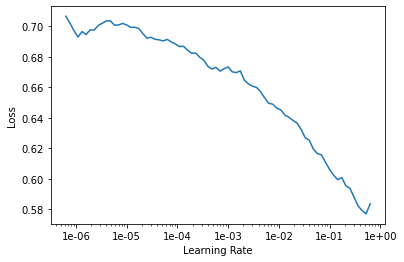

In [47]:
learner.recorder.plot()

In [48]:
learner.fit_one_cycle(10, max_lr=1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.376862,0.406866,0.815000,00:03
1,0.378191,0.395559,0.825000,00:03
2,0.380747,0.394863,0.835000,00:03
3,0.372544,0.375755,0.845000,00:03
4,0.373241,0.772493,0.800000,00:03
5,0.361582,0.383390,0.835000,00:03
6,0.367620,0.376145,0.820000,00:03
7,0.349133,0.372199,0.830000,00:03
8,0.363243,0.364811,0.845000,00:04
9,0.342917,0.357424,0.850000,00:03


In [54]:
learner.fit_one_cycle(5, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.346968,0.913549,0.835000,00:03
1,0.342408,0.352360,0.845000,00:03
2,0.344197,0.343663,0.840000,00:03
3,0.340799,0.328620,0.860000,00:03
4,0.345499,0.338104,0.855000,00:03


In [55]:
learner.fit_one_cycle(5, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.339138,0.334168,0.855000,00:03
1,0.350728,0.326012,0.865000,00:03
2,0.346091,0.343860,0.855000,00:03
3,0.336533,0.368456,0.850000,00:03
4,0.340525,0.374066,0.855000,00:03


In [57]:
learner.fit_one_cycle(5, max_lr=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.344741,0.368972,0.845000,00:04
1,0.343501,0.346481,0.850000,00:03
2,0.344127,0.342391,0.855000,00:03
3,0.333403,0.338731,0.850000,00:03
4,0.339423,0.336299,0.860000,00:03


### Predict

In [58]:
row = df.iloc[0]

In [59]:
learner.predict(row)

(Category >=50k, tensor(1), tensor([0.4537, 0.5463]))